In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from data_helper import *

In [2]:
log_name = "random_forest_regression"

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
import time

ks = (5, 50, 100, 250, 500)
vals = []
times = []

In [5]:
for k in ks:
    print(k)
    model = RandomForestRegressor(n_estimators = k)
    start = time.time()
    model.fit(dataset_in["train"]["full"], dataset_in["train"]['y'])
    times.append(time.time() - start)
    vals.append(model.score(dataset_in["val"]["full"], dataset_in["val"]['y']))

5
50
100
250
500


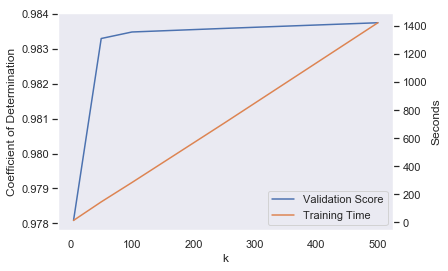

In [6]:
data = pd.DataFrame(zip(ks, times, vals), columns = ("k", "Training Time", "Validation Score"))
ax = data.plot(x = "k", y = ["Validation Score", "Training Time"], secondary_y = "Training Time", mark_right = False, ylabel = "Coefficient of Determination")
ax.right_ax.set_ylabel("Seconds")
ax.grid(False)
ax.right_ax.grid(False)
plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\RFR_kvalues.png", dpi = 300)

In [7]:
samples = [0.1* i for i in range(1, 11)]
vals = []
times = []

for sample in samples:
    print(sample)
    model = RandomForestRegressor(n_estimators = 100, max_samples = sample)
    start = time.time()
    model.fit(dataset_in["train"]["full"], dataset_in["train"]['y'])
    times.append(time.time() - start)
    vals.append(model.score(dataset_in["val"]["full"], dataset_in["val"]['y']))

0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


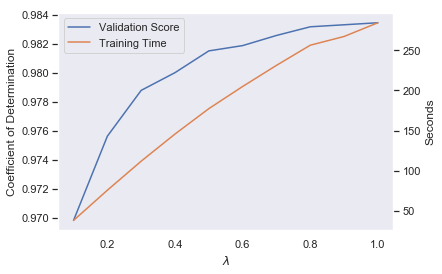

In [8]:
data = pd.DataFrame(zip(samples, times, vals), columns = ("Sample Size", "Training Time", "Validation Score"))
ax = data.plot(x = "Sample Size", y = ["Validation Score", "Training Time"], secondary_y = "Training Time", mark_right = False, ylabel = "Coefficient of Determination")
ax.right_ax.set_ylabel("Seconds")
ax.set_xlabel(r"$\lambda$")
ax.grid(False)
ax.right_ax.grid(False)
plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\RFR_sample_sizes.png", dpi = 300)

In [11]:
check_on_dataset(RandomForestRegressor, "rfr", log_name, max_samples = 0.7)

In [12]:
check_on_dataset(scaled_model, "rfr_scaled", log_name, final_model = RandomForestRegressor, max_samples = 0.7)

In [13]:
pca_values = {'dist': 1, 'dist_time': 2, 'dist_remoteness': 6, 'full': 8, 'simd': 11}
for subset in pca_values.keys():
    fit_and_evaluate_ML_model(PCA_model, "pca_rfr", dataset_in, subset, log_name, final_model = RandomForestRegressor, n_components = pca_values[subset], max_samples = 0.7)